# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">1. | Introduction of Data 👋</div>

The [Personal Key Indicators of Heart Disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) dataset contains 320K rows and 18 columns. It is a cleaned, smaller version of the 2020 annual CDC (Centers for Disease Control and Prevention) survey data of 400k adults. For each patient (row), it contains the health status of that individual. The data was collected in the form of surveys conducted over the phone. Each year, the CDC calls around 400K U.S residents and asks them about their health status, with the vast majority of questions being yes or no questions. Below is a description of the features collected for each patient: 


| # | Feature | Description
| --- | --- | --- 
| 1 | HeartDisease | Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
| 2 | BMI | Body Mass Index (BMI)
| 3 | Smoking | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
| 4 | AlcoholDrinking | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
| 5 | Stroke | (Ever told) (you had) a stroke?
| 6 | PhysicalHealth | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 
| 7 | MentalHealth | Thinking about your mental health, for how many days during the past 30 days was your mental health not good?
| 8 | DiffWalking | Do you have serious difficulty walking or climbing stairs?
| 9 | Sex | Are you male or female?
| 10 | AgeCategory | Fourteen-level age category
| 11 | Race | Imputed race/ethnicity value
| 12 | Diabetic | (Ever told) (you had) diabetes?
| 13 | PhysicalActivity | Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
| 14 | GenHealth | Would you say that in general your health is...
| 15 | SleepTime | On average, how many hours of sleep do you get in a 24-hour period?
| 16 | Asthma | (Ever told) (you had) asthma?
| 17 | KidneyDisease | Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
| 18 | SkinCancer | (Ever told) (you had) skin cancer?

**Import the important library** 

In [1]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde, gaussian_kde
from matplotlib import gridspec
from sklearn.preprocessing import LabelEncoder , StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

**Read data by pd.read_csv from pandas and save it in df**

In [3]:
# Import Dataset
# df = pd.read_csv('G:\\tensorflow\\Feature Engineering Projects\\heart_2020_cleaned.csv')
df = pd.read_csv('data/heart_2020_cleaned.csv')
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


**Show informations about the data**

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">3. | Cleaning Data👋</div>

#### **Remove Duplicated rows** 

* Good practice to **remove duplicated rows** before oversampling. Oversampling is a technique used to balance an imbalanced dataset by increasing the number of samples in the minority class. If the dataset contains duplicated rows, they will be included in the oversampleddataset,leading to a further imbalance.

* Additionally, duplicated rows can also skew the results of your model and affect the validity of your analysis, as each duplicated row will carry the same information and therefore contribute to the same result.

* By **removing** **duplicated** **rows**, you can ensure that your dataset is more representative of the underlying population, and that the results of your analysis are more accurate and reliable.


In [4]:
new_df = df.drop_duplicates() 

In [5]:
new_df.shape 

(301717, 18)

**Solve Imbalance Problem In Heart Disease Column using Random Over Sampler technique** 

In [6]:
# prepare variables to Solve Imbalance Problem In Heart Disease Column using Random Over Sampler techinque
features = new_df.drop(columns =['HeartDisease'], axis = 1)
target = new_df['HeartDisease']  

In [7]:
oversample=RandomOverSampler(sampling_strategy='minority')
x_resamled, y_resampled = oversample.fit_resample(features, target)

In [8]:
# Convert the arrays to a DataFrame
cols =['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory','Race' , 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'HeartDisease']
data = pd.DataFrame(np.column_stack((x_resamled, y_resampled)), columns=cols)

print(data.shape)

(548912, 18)


In [9]:
# Now Count repated values in HeartDisease Column after Solving Imbalance Problem using Random Over Sampler techinque
data['HeartDisease'].value_counts()

HeartDisease
No     274456
Yes    274456
Name: count, dtype: int64

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='HeartDisease', ylabel='count'>

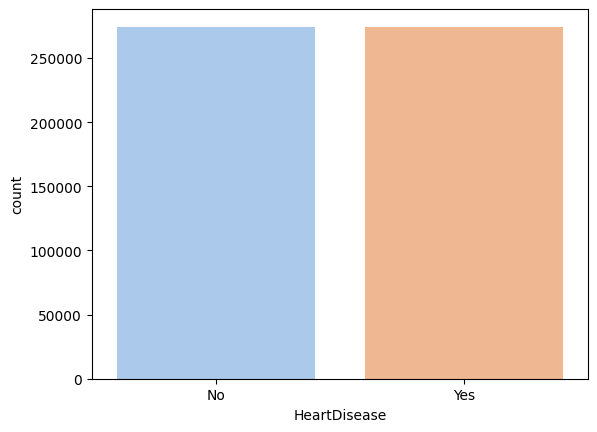

In [10]:
#the distribution of the target variable
sns.countplot(x='HeartDisease',data=data,palette='pastel')

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">4. | Encoding  Categorical columns 👋</div>

* label multiple binary columns with **"yes" and "no"** , we will use a loop and the map function.etc., you can label them like this:

In [11]:
binary_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity' , 'Asthma', 'KidneyDisease', 'SkinCancer']

for column in binary_columns:
    data[column] = data[column].replace({'No':0 , 'Yes':1}) 

 * label the values in a column representing the sex of individuals, you can use the map function. For example, if you have a pandas DataFrame with a column named "sex" and the values are represented as integers (e.g. **0 for female, 1 for male**), you can label it like this:

In [12]:
data['Sex'] = data['Sex'].replace({'Female':0 ,  'Male':1}) 

* label the values in a column representing the general health status of individuals, you can use the map function."genhealth" and the values are represented as integers (e.g. **3 for excellent ,3 for Very Good , 2 for good ,1 for fair, 0 for poor**), you can label it like this:

In [13]:
data['GenHealth'] = data['GenHealth'].map({'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4})    

* label the values in a column representing whether individuals have diabetes or not,"diabetic" and the values are represented as integers (**{'No':0, 'No, borderline diabetes':1, 'Yes (during pregnancy)':2, 'Yes':3}**


In [14]:
data['Diabetic'] = data['Diabetic'].replace({'No':0 , 'No, borderline diabetes':1 ,  'Yes (during pregnancy)':2 , 'Yes':3})                   

* label the values in a column representing the time individuals spend sleeping, "sleep_time" representing the time individuals spend sleeping in hours, you can label it like this:
      * bins = (0, 6, 8, 24)
      * labels = **('less than 6 hours', '6-8 hours', 'more than 8 hours')**

In [15]:
col = 'SleepTime'
data.loc[ (data[col] <= 6) , col ] = 0 
data.loc[ (data[col] > 6) & (data[col] <= 8 ) , col ] = 1
data.loc[ (data[col] > 8 ) & (data[col] <=24), col ] = 2    

In [16]:
cols =['PhysicalHealth' ,'MentalHealth']

for col in cols:
        data.loc[ data[col] <=10 , col ] = 0
        data.loc[ (data[col] > 10) & (data[col] <=20 ) , col ] = 1
        data.loc[ (data[col] > 20) & (data[col] <=25 ) , col ] = 2
        data.loc[ (data[col] > 25) & (data[col] <=30 ) , col ] = 3
        
data[cols[0]].value_counts()  

PhysicalHealth
0    447773
3     64152
1     31417
2      5570
Name: count, dtype: int64

In [17]:
data.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.6,1,0,0,0,3,0,0,55-59,White,3,1,3,0,1,0,1,0
1,20.34,0,0,1,0,0,0,0,80 or older,White,0,1,3,1,0,0,0,0
2,26.58,1,0,0,1,3,0,1,65-69,White,3,1,1,1,1,0,0,0
3,24.21,0,0,0,0,0,0,0,75-79,White,0,0,2,0,0,0,1,0
4,23.71,0,0,0,3,0,1,0,40-44,White,0,1,3,1,0,0,0,0


#### Get Information for Features and unique values in columns

In [18]:
# Get Information for Features and unique values in columns
for feature in data.columns:
    print(feature)
    print(data[feature].unique()  , len(data[feature].unique()) , 'unique in',feature )
    print('----------------------')

BMI
[16.6 20.34 26.58 ... 62.42 51.46 46.56] 3604 unique in BMI
----------------------
Smoking
[1 0] 2 unique in Smoking
----------------------
AlcoholDrinking
[0 1] 2 unique in AlcoholDrinking
----------------------
Stroke
[0 1] 2 unique in Stroke
----------------------
PhysicalHealth
[0 1 3 2] 4 unique in PhysicalHealth
----------------------
MentalHealth
[3 0 1 2] 4 unique in MentalHealth
----------------------
DiffWalking
[0 1] 2 unique in DiffWalking
----------------------
Sex
[0 1] 2 unique in Sex
----------------------
AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 13 unique in AgeCategory
----------------------
Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 6 unique in Race
----------------------
Diabetic
[3 0 1 2] 4 unique in Diabetic
----------------------
PhysicalActivity
[1 0] 2 unique in PhysicalActivity
----------------------
GenHealth
[3 1 2 0 4] 5 unique in

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">1. |  feature extraction 👋</div>

In [19]:
data["BMI"]
print(data["BMI"].unique()  , len(data["BMI"].unique()) , 'unique in',feature ) 

[16.6 20.34 26.58 ... 62.42 51.46 46.56] 3604 unique in HeartDisease


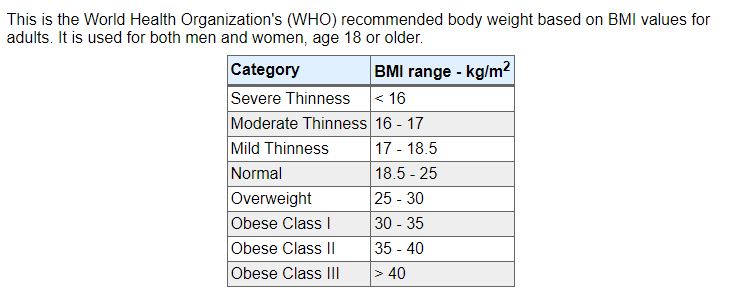

In [20]:
#####Function used to transform BMI Values to categories
def transform_bmi(value):
    if value<16:
        return 0
    elif value>=16 and value<17:
        return 1
    elif value>=17 and value<18.5:
        return 2
    elif value>=18.5 and value<25:
        return 3
    elif value>=25 and value<30:
        return 4
    elif value>=30 and value<35:
        return 5
    elif value>=35 and value<40:
        return 6
    elif value>=40 :
        return 7

In [21]:
data["BMI"] = data["BMI"].apply(transform_bmi)
data["BMI"].value_counts(ascending= False)

BMI
4    195125
3    147912
5    114883
6     49419
7     32892
2      5913
1      1444
0      1324
Name: count, dtype: int64

In [22]:
data['AgeCategory']
print(data['AgeCategory'].unique()  , len(data['AgeCategory'].unique()) , 'unique in',feature )

['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 13 unique in HeartDisease


* AgeCategories 
    - young(30<=AgeCategory <35)
    - mature(35<=AgeCategory <50)
    - senior(50<=AgeCategory <65)
    - old(65<=AgeCategory <80)
    - veryold(80<=AgeCategory )

In [23]:
mapping = {'18-24':0, '25-29': 0, '30-34':0, '35-39':1 , 
           '40-44':1,  '45-49':1, '50-54':2, '55-59':'2', 
           '60-64':'2','65-69':'3', '70-74':'3', '75-79':'3', '80 or older':'4'}


data['AgeCategory'] = data['AgeCategory'].replace(mapping)

In [24]:
data

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,1,1,0,0,0,3,0,0,2,White,3,1,3,0,1,0,1,0
1,3,0,0,1,0,0,0,0,4,White,0,1,3,1,0,0,0,0
2,4,1,0,0,1,3,0,1,3,White,3,1,1,1,1,0,0,0
3,3,0,0,0,0,0,0,0,3,White,0,0,2,0,0,0,1,0
4,3,0,0,0,3,0,1,0,1,White,0,1,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548907,5,1,0,0,0,0,1,0,3,White,3,0,2,1,1,0,0,1
548908,5,1,0,0,0,0,0,0,2,White,0,1,3,0,0,0,0,1
548909,5,0,0,0,0,0,0,1,3,White,0,1,3,1,0,0,1,1
548910,4,1,0,0,0,0,1,1,3,White,0,0,3,0,0,0,0,1


# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">1. |  feature selection 👋</div>

Correlation among features

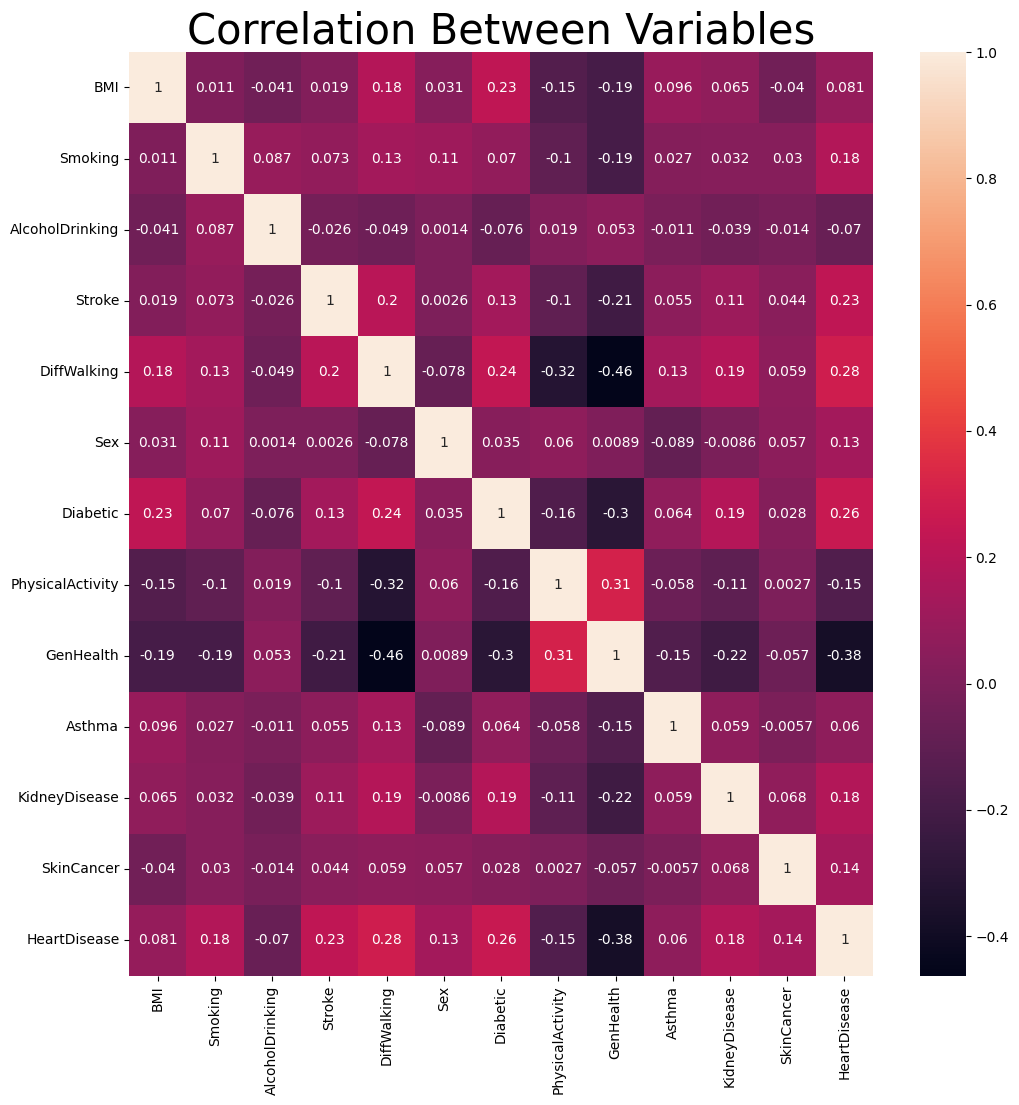

In [25]:
plt.figure(figsize=(12,12))
correlation_matrix = data.select_dtypes(include=['int', 'float']).corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Between Variables', fontsize = 30)
plt.show()

#### Remove column name 'Race'

In [26]:
data['Race']
print(data['Race'].unique()  , len(data['Race'].unique()) , 'unique in',feature )

['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 6 unique in HeartDisease


In [27]:
data.drop('Race' , axis=1 , inplace=True)

###select feature by class select percentile

In [28]:
data.dtypes

BMI                  int64
Smoking              int64
AlcoholDrinking      int64
Stroke               int64
PhysicalHealth      object
MentalHealth        object
DiffWalking          int64
Sex                  int64
AgeCategory         object
Diabetic             int64
PhysicalActivity     int64
GenHealth            int64
SleepTime           object
Asthma               int64
KidneyDisease        int64
SkinCancer           int64
HeartDisease         int64
dtype: object

In [29]:
# data['BMI'] = data['BMI'].astype(float)
# data['SleepTime'] = data['SleepTime'].astype(float)
# data['AgeCategory'] = data['AgeCategory '].astype(float)
# data['PhysicalHealth'] = data['PhysicalHealth'].astype(float)
# data['MentalHealth'] = data['MentalHealth'].astype(float)

In [30]:
cat_cols = [] 

for col in data.columns:
    if data[col].dtype == 'object':
        cat_cols.append(col) 

In [31]:
y=data['HeartDisease']
X=data.drop(['HeartDisease'], axis=1)
X.shape

(548912, 16)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

print(x_train.shape)
print(x_test.shape)
x_train.head()

(439129, 16)
(109783, 16)


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
69370,4,0,0,0,0,0,0,0,0,0,1,3,1,0,0,0
199879,5,0,0,0,0,0,0,0,2,3,1,1,1,0,0,0
422758,4,0,0,0,0,0,0,1,3,0,1,3,1,0,0,0
122298,6,0,1,0,0,0,0,1,3,0,0,3,1,0,0,1
536449,4,1,0,0,0,0,0,0,3,3,1,2,2,0,0,1


In [33]:
# # Specify index of categorical features in input data
cat_features = [X.columns.get_loc(col) for col in cat_cols]

# Model parameter dict
params = {'iterations':500,
          'loss_function':'Logloss',
          'depth':4,
          'early_stopping_rounds':20,
          'custom_loss':['AUC', 'Accuracy']}

# Instantiate model
model = CatBoostClassifier(**params)

# Fit model
model.fit(
    x_train,
    y_train,
    cat_features=cat_features,
    eval_set=(x_test, y_test),
    verbose=50,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.192565
0:	learn: 0.6342653	test: 0.6344213	best: 0.6344213 (0)	total: 284ms	remaining: 2m 21s
50:	learn: 0.4963650	test: 0.4966113	best: 0.4966113 (50)	total: 11.7s	remaining: 1m 42s
100:	learn: 0.4947777	test: 0.4952906	best: 0.4952906 (100)	total: 22.9s	remaining: 1m 30s
150:	learn: 0.4939306	test: 0.4946877	best: 0.4946877 (150)	total: 33.6s	remaining: 1m 17s
200:	learn: 0.4931137	test: 0.4940797	best: 0.4940797 (200)	total: 44.3s	remaining: 1m 5s
250:	learn: 0.4924866	test: 0.4935999	best: 0.4935999 (250)	total: 54.6s	remaining: 54.2s
300:	learn: 0.4919318	test: 0.4932208	best: 0.4932208 (300)	total: 1m 5s	remaining: 43s
350:	learn: 0.4914059	test: 0.4928126	best: 0.4928126 (350)	total: 1m 15s	remaining: 32.1s
400:	learn: 0.4909367	test: 0.4923854	best: 0.4923854 (400)	total: 1m 25s	remaining: 21.2s
450:	learn: 0.4904942	test: 0.4921317	best: 0.4921317 (450)	total: 1m 36s	remaining: 10.5s
499:	learn: 0.4901818	test: 0.4919095	best: 0.4919095 (499)	total: 1m 4

In [35]:
# Make predictions on test data
preds = model.predict(x_test)                                     

In [36]:
# Evaluate predictions
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75     55167
           1       0.74      0.81      0.77     54616

    accuracy                           0.76    109783
   macro avg       0.76      0.76      0.76    109783
weighted avg       0.77      0.76      0.76    109783

[[39625 15542]
 [10509 44107]]


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Define classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
#   "K-Neighbors Classifier": KNeighborsClassifier(),
#"Support Vector Classifier": SVC(),
}

model_list = []
accuracy_list = []

for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate the model
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    model_list.append(model_name)
    accuracy_list.append(test_accuracy)
    
    print(model_name)
    print('Model performance for Training set')
    print("- Train Accuracy: {:.4f}".format(train_accuracy))
    
    print('Model performance for Test set')
    print("- Test Accuracy: {:.4f}".format(test_accuracy))
    print('=' * 35)
    print('\n')


Logistic Regression
Model performance for Training set
- Train Accuracy: 0.7550
Model performance for Test set
- Test Accuracy: 0.7537


Random Forest Classifier
Model performance for Training set
- Train Accuracy: 0.8631
Model performance for Test set
- Test Accuracy: 0.8425


Gradient Boosting Classifier
Model performance for Training set
- Train Accuracy: 0.7602
Model performance for Test set
- Test Accuracy: 0.7593


Decision Tree Classifier
Model performance for Training set
- Train Accuracy: 0.8631
Model performance for Test set
- Test Accuracy: 0.8396




In [39]:
classification_results = pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy'])
# Sort the DataFrame by Accuracy in descending order
classification_results = classification_results.sort_values(by=["Accuracy"], ascending=False)
classification_results

,Model Name,Accuracy
1,Random Forest Classifier,0.842453
3,Decision Tree Classifier,0.839593
2,Gradient Boosting Classifier,0.759334
0,Logistic Regression,0.753705


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
feature_importances = random_forest_model.feature_importances_
feature_importances

array([0.12531504, 0.02819893, 0.01468258, 0.04369477, 0.04496324,
       0.04238293, 0.05569433, 0.04017336, 0.24151731, 0.0591457 ,
       0.03279491, 0.1415995 , 0.06309243, 0.02694561, 0.01763258,
       0.02216678])

> > 

In [58]:
y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model: {:.2f}%".format(accuracy * 100))

Accuracy of the model: 84.26%


# Plot y_pred and y_test

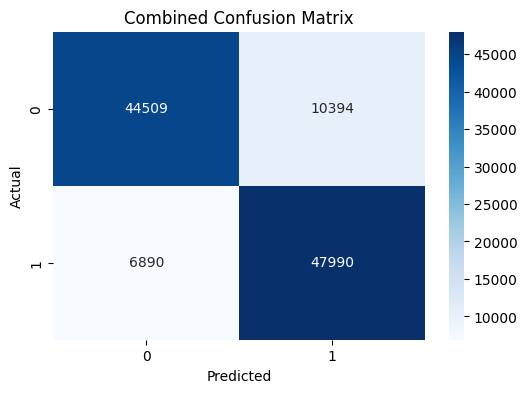

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have already trained your random_forest_model and made predictions (y_pred)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the combined confusion matrix
plt.figure(figsize=(6, 4))
plt.title('Combined Confusion Matrix')
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [60]:

# Calculate the classification report
classification_rep = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84     54903
           1       0.82      0.87      0.85     54880

    accuracy                           0.84    109783
   macro avg       0.84      0.84      0.84    109783
weighted avg       0.84      0.84      0.84    109783



###select feature by class SelectFromModel

In [61]:
import pickle
MODEL_STORAGE_PATH = 'models/'
random_forest_model = RandomForestClassifier()
model_name = f'heart_disease_model_{datetime.today().strftime("%Y-%m-%d")}'
with open(MODEL_STORAGE_PATH + model_name + '.pkl', 'wb') as model_file:
    pickle.dump(random_forest_model, model_file)